# Tachometer Notes

In [58]:
# import required packages
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
from IPython.display import Image
%matplotlib inline

This is what the IR receiver's signal looks like with 100$\Omega$ on the 3.3V PWM  at 38kHz:
![1kohm](100ohm.bmp "Title")

This is what the IR receiver's signal looks like with 1K$\Omega$ on the 3.3V PWM  at 38kHz:
![1kohm](1kohm.bmp "Title")

This is what the IR receiver's signal looks like with 1K$\Omega$ on the 3.3V PWM  at 28kHz:
![1kohm](1000ohm28000hz.bmp "Title")

I was having a lot of trouble with the signal jumping all over the place when the reflector wasn't in front of the sensor, so I decided I needed to lower the sensitivity of the receiver. 

The IR receiver is _very_ sensitive to 38kHz IR, but less so as the frequency deviates from that value. I changed the PWM to 28kHz, and now the signal is much cleaner.

Also, I've found it helps to keep the sensor pointed just off from normal to the surface of the reflector so that only the reflector reflects the IR.

In [41]:
df = pd.read_csv(files[0], ",", parse_dates=0,
                 names=['time','tick'])
print df

        time  tick
0   0.904992     1
1   0.916759     1
2   0.923520     1
3   0.933889     1
4   0.945759     1
5   0.952154     1
6   0.960239     1
7   0.968128     1
8   0.976031     1
9   0.984078     1
10  0.991924     1
11  1.006216     1
12  1.014346     1
13  1.022238     1
14  1.030031     1
15  1.038164     1
16  1.046144     1
17  1.053956     1
18  1.061853     1
19  1.069646     1
20  1.080250     1
21  1.088175     1
22  1.096148     1
23  1.104122     1
24  1.111959     1
25  1.119907     1
26  1.127698     1
27  1.147178     1
28  1.153597     1
29  1.169361     1
30  1.173579     1
31  1.184711     1
32  1.192679     1
33  1.200736     1
34  1.314382     1
35  1.315113     1
36  1.315631     1
37  1.316034     1
38  1.318446     1
39  1.319005     1
40  1.319456     1
41  1.319868     1
42  1.322240     1
43  1.322795     1
44  1.323244     1
45  1.323693     1
46  1.325823     1
47  1.326411     1
48  1.326879     1
49  1.327274     1
50  1.327698     1
51  1.330242

In [49]:
s = pd.Series(np.zeros(500))
for i in range(1,500,1):
    s[i] = df.time[i]-df.time[i-1]
df1 = pd.concat([df.time,s], axis=1)
print df1

           0         1
0   0.904992  0.000000
1   0.916759  0.011767
2   0.923520  0.006761
3   0.933889  0.010369
4   0.945759  0.011870
5   0.952154  0.006395
6   0.960239  0.008085
7   0.968128  0.007889
8   0.976031  0.007903
9   0.984078  0.008047
10  0.991924  0.007846
11  1.006216  0.014292
12  1.014346  0.008130
13  1.022238  0.007892
14  1.030031  0.007793
15  1.038164  0.008133
16  1.046144  0.007980
17  1.053956  0.007812
18  1.061853  0.007897
19  1.069646  0.007793
20  1.080250  0.010604
21  1.088175  0.007925
22  1.096148  0.007973
23  1.104122  0.007974
24  1.111959  0.007837
25  1.119907  0.007948
26  1.127698  0.007791
27  1.147178  0.019480
28  1.153597  0.006419
29  1.169361  0.015764
30  1.173579  0.004218
31  1.184711  0.011132
32  1.192679  0.007968
33  1.200736  0.008057
34  1.314382  0.113646
35  1.315113  0.000731
36  1.315631  0.000518
37  1.316034  0.000403
38  1.318446  0.002412
39  1.319005  0.000559
40  1.319456  0.000451
41  1.319868  0.000412
42  1.32224

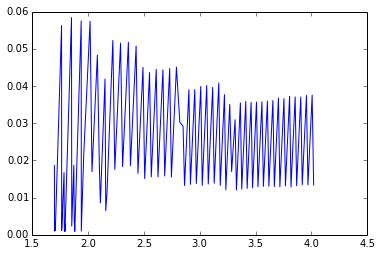

In [54]:
plt.plot(df.time[100:200],s[100:200])

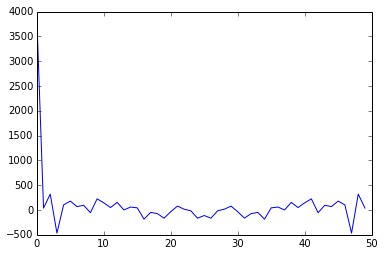

In [48]:
x = df.raw[-50:]
xfft = fft(x)
xreal = xfft.real
plt.plot(xreal)

### Massflow

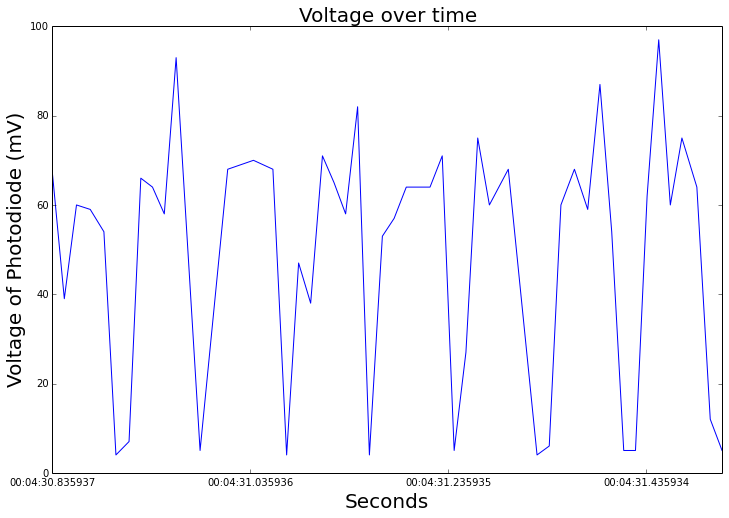

In [49]:
plt.figure(figsize=(12,8))
font = 20
begin = 500
end = 550

df_window = df.iloc[begin:end]

plt.plot(df_window.index, df_window.raw)
#plt.plot(v_data.timestamp, v_data.voltage)

plt.title('Voltage over time', fontsize=font)
#plt.ylim([0, 17])
plt.xlabel('Seconds', fontsize=font)
plt.ylabel('Voltage of Photodiode (mV)', fontsize=font)
#plt.legend(['CR1000 Collected'], loc=5, fontsize=font)`